<a href="https://colab.research.google.com/github/sumitrimal/1BM22AI141-AGA_LAB/blob/main/lab_04_aga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

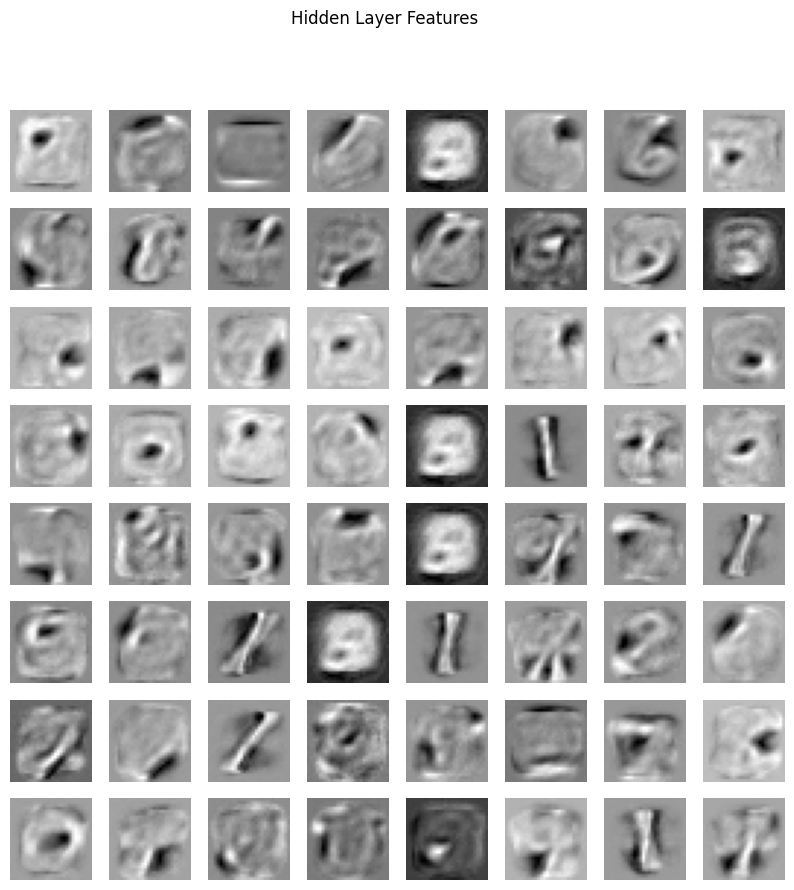

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import BernoulliRBM
mnist = fetch_openml('mnist_784')
data = mnist.data / 255.0

rbm = BernoulliRBM(n_components=64, learning_rate=0.1, n_iter=10, random_state=42)
rbm.fit(data)


weights = rbm.components_

n_cols = 8
n_rows = weights.shape[0] // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))

for i, ax in enumerate(axes.ravel()):
    ax.imshow(weights[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.suptitle("Hidden Layer Features")
plt.show()


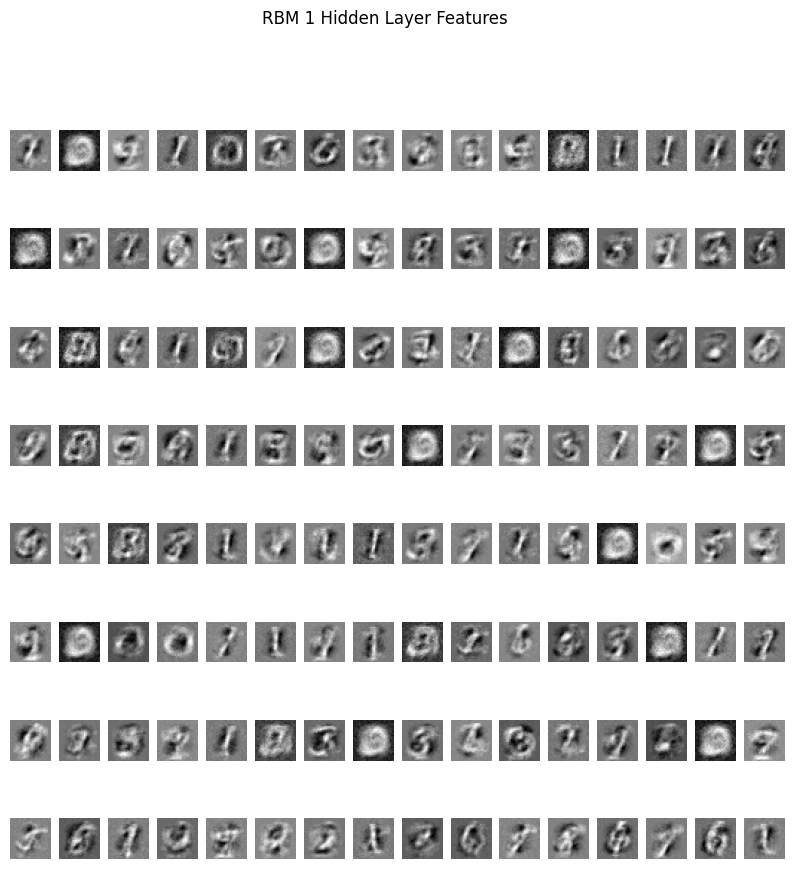

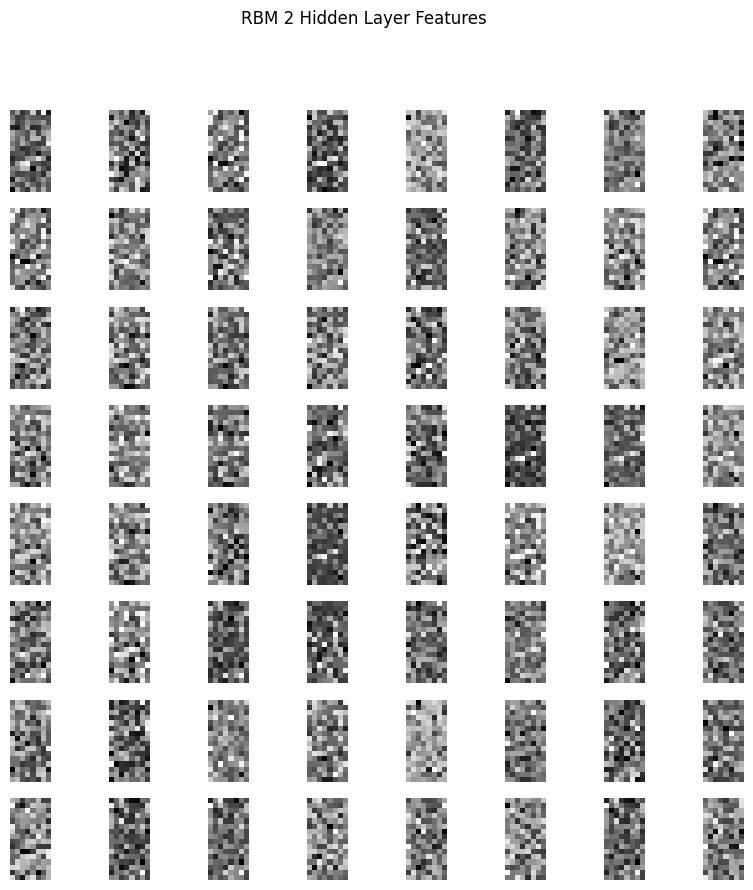

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import BernoulliRBM
mnist = fetch_openml('mnist_784')
data = mnist.data[:500] / 255.0
def train_rbm(data, n_components, learning_rate=0.1, n_iter=10):
    rbm = BernoulliRBM(n_components=n_components, learning_rate=learning_rate, n_iter=n_iter, random_state=42)
    rbm.fit(data)
    return rbm
rbm1 = train_rbm(data, n_components=128)
hidden_activations1 = rbm1.transform(data)
rbm2 = train_rbm(hidden_activations1, n_components=64)
def plot_rbm_weights(weights, input_shape, n_rows, n_cols, title):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(weights[i].reshape(input_shape), cmap='gray')  # Reshape weights
        ax.axis('off')
    plt.suptitle(title)
    plt.show()
plot_rbm_weights(rbm1.components_, (28, 28), n_rows=8, n_cols=16, title="RBM 1 Hidden Layer Features")
plot_rbm_weights(rbm2.components_, (16, 8), n_rows=8, n_cols=8, title="RBM 2 Hidden Layer Features")
